# Learn OpenAI Whisper - Chapter 3

## Complementary introduction to audio data processing with Hugging Face and Whisper


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1bIiGyv_YiTdq97a7KrowCceOrZlG2hXL)

In this notebook, we'll explore the essentials of working with audio data in Python, leveraging the power of Hugging Face's `datasets` library and OpenAI's Whisper model. Our journey will take us through setting up a Hugging Face account, loading and exploring an audio dataset, preprocessing that dataset to meet the requirements of machine learning models, and finally, transcribing audio to text using the state-of-the-art Whisper model.

Audio data processing is a pivotal step in numerous machine learning applications, from developing voice-activated assistants to creating systems capable of understanding and transcribing spoken language in real-time. By the end of this notebook, you'll have a solid foundation in handling audio data, which you can apply to a wide range of natural language processing tasks.


## Setting Up a Hugging Face Account

To access and utilize the vast array of datasets and machine learning models available on Hugging Face, an account is required. A Hugging Face account offers not just access to datasets like "PolyAI/minds14" but also allows for collaboration on projects, contribution to the community through dataset/model sharing, and even tracking progress on various machine learning tasks. Follow the steps outlined above to create your account and get started with Hugging Face.

## To create a Hugging Face account, you can follow these simple steps:
<img src="https://github.com/PacktPublishing/Learn-OpenAI-Whisper/raw/main/Chapter03/hugging_face_join.png" width=250>

1. Go to the Hugging Face website.
2. Click on “Sign Up” or go to https://huggingface.co/join
3. Enter your email address and password (you can skip the prompt to "Join organization").
4. If you already have an account, click on “Log in”.
5. To interact with the Hub, you need to be logged in with a Hugging Face account.

## To create a Hugging Face Access Token
<img src="https://github.com/PacktPublishing/Learn-OpenAI-Whisper/raw/main/Chapter03/hugging_face_settings_menu_option.png" width=650>
<img src="https://github.com/PacktPublishing/Learn-OpenAI-Whisper/raw/main/Chapter03/hugging_face_create_token.png" width=250>

1. Go to the Access Tokens tab in your Hugging Face settings.
2. Click on the New token button to create a new User Access Token.
3. Select the `write` role and a name for your token. This notebook only needs a `read` role; however, we will be writing to Hugging Face in [Chapter 4](https://colab.research.google.com/drive/1LADNomT0JUBCsopU6r_NsZfOaNiz2N3h).

## OPTIONAL: To authenticate your identity using your "Secrets" in Colab
<img src="https://github.com/PacktPublishing/Learn-OpenAI-Whisper/raw/main/Chapter03/hugging_face_token_notebook_access.png" width=450>

1. In your Colab notebook, click on the key icon on the left to add a new secret.
2. Set the name of the secret to HF_TOKEN.
3. Paste your Hugging Face token value in the Value field.
4. Click Add to save the secret.
5. Turn ON "Notebook access".

You can now use the secret token in your Colab notebook to authenticate. Make sure to keep your token private and not share it with anyone else. Happy coding! 😊

# Load and explore an audio dataset
In this section, we dive into loading and exploring an audio dataset using the `datasets` library. Specifically, we're working with the "PolyAI/minds14" dataset, a rich collection of audio recordings intended for intent classification tasks—crucial for building voice-operated interfaces and understanding natural language commands. Through the code snippets below, we inspect the dataset's structure, listen to audio samples directly within the notebook, and employ visualization techniques to analyze the audio signals. This hands-on exploration is foundational for grasping the nuances of audio data in machine learning applications.


### Install datasets Library with Audio Support
To begin working with audio datasets, we first need to install the `datasets` library, ensuring we include support for audio data.
This is done by specifying `[audio]` after the library name, which installs additional dependencies necessary for audio processing.

In [15]:
%%capture
!pip install pyarrow==14.0.2
!pip install datasets[audio]

### Setting Environment Variables for Hugging Face Authentication
Next, we set up our environment to authenticate with Hugging Face. This involves storing our Hugging Face API token as an environment variable. This token allows us to access Hugging Face's datasets and models securely.

#### Option 1: Authenticate via Huggig Face's notebook_login class by copying the token from the Hugging Face website and pasting it at the prompt:

```
from huggingface_hub import notebook_login
notebook_login()
```
#### Option 2: You can also authenticate using the Hugging Face's CLI command
```
!huggingface-cli login
```
<img src="https://github.com/PacktPublishing/Learn-OpenAI-Whisper/raw/main/Chapter03/hugging_face_cli_authenticate.png" width=850>

Run either option 1, or 2, then verify using:
```
from huggingface_hub import whoami
whoami()
```


In [ ]:
# Option 1 - Enter your token in the output prompt below and hit enter on Windows or return on Mac
from huggingface_hub import notebook_login
notebook_login()

In [16]:
# Option 2 - Enter your token in the output prompt below and hit enter on Windows or return on Mac
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.c

In [17]:
# Verify authentication
from huggingface_hub import whoami
whoami()
# you should see something like {'type': 'user',  'id': '...',  'name': 'Wauplin', ...}

{'type': 'user',
 'id': '6404c20d3d49e1e066b97c10',
 'name': 'jbatista79',
 'fullname': 'Josue Batista',
 'email': 'josue@josuebatista.com',
 'emailVerified': True,
 'canPay': False,
 'isPro': False,
 'periodEnd': None,
 'avatarUrl': '/avatars/e686904a94e267b4570907a7e734fbb4.svg',
 'orgs': [],
 'auth': {'type': 'access_token',
  'accessToken': {'displayName': 'Whisper Fine-Tuning', 'role': 'write'}}}

### Loading the Audio Dataset
Here, we load the "PolyAI/minds14" dataset from Hugging Face's datasets library, specifying `en-US` as the language and `train` as the dataset split we wish to load. This dataset is designed for intent classification within spoken language understanding, a critical task in developing conversational AI.


In [18]:
from datasets import load_dataset

minds = load_dataset("PolyAI/minds14", name="en-US", split="train")
minds

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 563
})

### Displaying an Example Entry from the Dataset
To get a feel for the dataset's structure, we display the first entry. This gives us insight into the data's format, including the audio file's properties and any associated metadata, such as the transcription and intent classification.

In [19]:
example = minds[0]
for key, value in example.items():
    print(f"{key}: {value}")

path: /root/.cache/huggingface/datasets/downloads/extracted/28aa727f91fee90575c34956bab09d1716cfaf460c6afcba86a10f04a7d58b83/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav
audio: {'path': '/root/.cache/huggingface/datasets/downloads/extracted/28aa727f91fee90575c34956bab09d1716cfaf460c6afcba86a10f04a7d58b83/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav', 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
        0.        ,  0.        ]), 'sampling_rate': 8000}
transcription: I would like to set up a joint account with my partner
english_transcription: I would like to set up a joint account with my partner
intent_class: 11
lang_id: 4


### Mapping Intent Class IDs to Descriptive Labels
This dataset includes numerical identifiers for intent classes. To make these identifiers more understandable, we map them to their descriptive labels, making it easier to interpret the data.

In [20]:
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'joint_account'

### Removing Unnecessary Columns from the Dataset
To streamline our dataset for analysis, we remove columns that are not needed for our current task, such as `lang_id` and `english_transcription`. This simplifies the dataset, focusing on the audio data and intent labels.


In [21]:
columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)

### Listening to an Audio Sample

Now that we've loaded and inspected the dataset, let's listen to an audio example. This helps us understand the quality and content of the audio data we'll be working with.

In [22]:
from IPython.display import Audio

example = minds[6]
wav_array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

Audio(data=wav_array, rate=sampling_rate)

### Visualizing an Audio Signal
Visualizing audio signals can provide valuable insights into their characteristics. Here, we plot the waveform of an audio sample, helping us to observe its amplitude variations over time. This visual representation is useful for understanding the audio data's structure and identifying patterns.

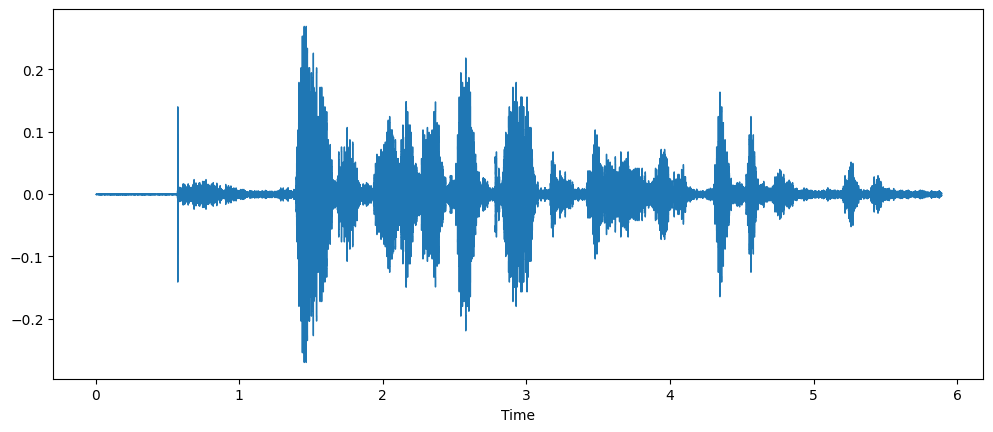

In [23]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

# Preprocessing the Audio Dataset for Machine Learning

Before feeding audio data into machine learning models, it's essential to preprocess it. This section outlines the preprocessing steps necessary to transform the audio data into a format suitable for analysis and modeling. We'll cover casting the audio data to a consistent format, filtering recordings based on their duration to maintain uniformity, and extracting features that models can interpret. These preprocessing steps are vital for ensuring the quality and consistency of the input data, directly impacting the effectiveness of machine learning algorithms.


### Cast Audio Column to Uniform Format
To ensure that all audio data within our dataset adheres to a uniform format, we cast the `audio` column to a specific configuration using Hugging Face's `datasets` library. This step is crucial for maintaining consistency, especially when dealing with datasets that might contain audio files in various formats or sampling rates. Here, we standardize the audio data to a sampling rate of 16,000 Hz, which is a common rate used in speech recognition systems.


In [24]:
from datasets import Audio

minds = minds.cast_column("audio", Audio(sampling_rate=16000))

### Filter Out Long Audio Files
In speech and audio processing tasks, it's often beneficial to work with audio files of a consistent duration. Longer audio files can be problematic due to increased computational requirements and potential irrelevance of parts of the audio. Here, we define a function to check if the audio's length is within a specified maximum duration. This function will later be used to filter out any audio files exceeding our defined maximum length, ensuring a more uniform dataset conducive to efficient processing.

In [25]:
MAX_DURATION_IN_SECONDS = 10.0

def is_audio_length_in_range(input_length):
    return input_length < MAX_DURATION_IN_SECONDS

In [26]:
new_column = []

for i, example in enumerate(minds):
    # print(i)
    # print(example["audio"]["path"])
    audio_array = example["audio"]["array"]
    sr = example["audio"]["sampling_rate"]
    duration = librosa.get_duration(y=audio_array, sr=sr)
    new_column.append(duration)
    # print(f"{duration:.2f}s")
    # if i == 5:
    #     break

minds = minds.add_column("duration", new_column)
# Printing the duration for 5 audio samples
for i, example in enumerate(minds):
    # print(i)
    # print(example["audio"]["path"])
    print(example["path"])
    print(example["duration"])
    if i == 5:
        break

/root/.cache/huggingface/datasets/downloads/extracted/28aa727f91fee90575c34956bab09d1716cfaf460c6afcba86a10f04a7d58b83/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav
10.837375
/root/.cache/huggingface/datasets/downloads/extracted/28aa727f91fee90575c34956bab09d1716cfaf460c6afcba86a10f04a7d58b83/en-US~JOINT_ACCOUNT/602baf24bb1e6d0fbce922a7.wav
6.656
/root/.cache/huggingface/datasets/downloads/extracted/28aa727f91fee90575c34956bab09d1716cfaf460c6afcba86a10f04a7d58b83/en-US~JOINT_ACCOUNT/602b9f97963e11ccd901cc32.wav
24.234625
/root/.cache/huggingface/datasets/downloads/extracted/28aa727f91fee90575c34956bab09d1716cfaf460c6afcba86a10f04a7d58b83/en-US~JOINT_ACCOUNT/602bacab5f67b421554f6488.wav
3.242625
/root/.cache/huggingface/datasets/downloads/extracted/28aa727f91fee90575c34956bab09d1716cfaf460c6afcba86a10f04a7d58b83/en-US~JOINT_ACCOUNT/602b9d4cbb1e6d0fbce91fa4.wav
3.84
/root/.cache/huggingface/datasets/downloads/extracted/28aa727f91fee90575c34956bab09d1716cfaf460c6afcba86a10f04a7d58b83/e

### Apply Length Filter to Dataset
With our length filter function defined, we now apply it to our dataset. Using the `filter` method provided by the `datasets` library, we can efficiently remove entries that don't meet our duration criteria. This step iterates through the dataset, applying our `is_audio_length_in_range` function to each entry and retaining only those that fit within our specified maximum duration. This filtering process is a key step in preparing our dataset for subsequent analysis and modeling.


In [27]:
# use 🤗 Datasets' `filter` method to apply the filtering function
minds = minds.filter(is_audio_length_in_range, input_columns=["duration"])

# remove the temporary helper column
minds = minds.remove_columns(["duration"])
minds

Filter:   0%|          | 0/563 [00:00<?, ? examples/s]

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 417
})

### Feature Extraction with WhisperFeatureExtractor
Before we can transcribe audio data or use it for training machine learning models, we often need to extract relevant features from the raw audio. This process transforms audio data into a format that models can more easily interpret. Here, we utilize the `WhisperFeatureExtractor` from the `transformers` library to prepare our dataset for the Whisper model. The feature extractor standardizes the audio data, ensuring it's in the correct format and sampling rate expected by Whisper for efficient transcription.

In [28]:
from transformers import WhisperFeatureExtractor

feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

### Prepare Dataset for Whisper Model
To process our audio data with the Whisper model, we must first prepare it according to the model's requirements. This involves applying the `WhisperFeatureExtractor` to each audio file in our dataset. We define a `prepare_dataset` function that takes an example from our dataset, extracts its audio, and then applies the feature extractor. This function is mapped over the entire dataset, transforming each audio file into a format suitable for transcription with Whisper. This step is crucial for leveraging Whisper's capabilities to transcribe or analyze our audio data.


In [29]:
def prepare_dataset(example):
    audio = example["audio"]
    features = feature_extractor(
        audio["array"], sampling_rate=audio["sampling_rate"], padding=True
    )
    return features

In [30]:
minds = minds.map(prepare_dataset)
minds

Map:   0%|          | 0/417 [00:00<?, ? examples/s]

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class', 'input_features'],
    num_rows: 417
})

### Visualizing Preprocessed Audio Features
After preprocessing our audio data, it's helpful to visualize the resulting features to understand what the Whisper model will "see" when analyzing the audio. Here, we select an example from our preprocessed dataset and plot its features. This visualization can give us insight into the nature of the transformations applied by the `WhisperFeatureExtractor` and how they might influence the model's performance on our audio data.


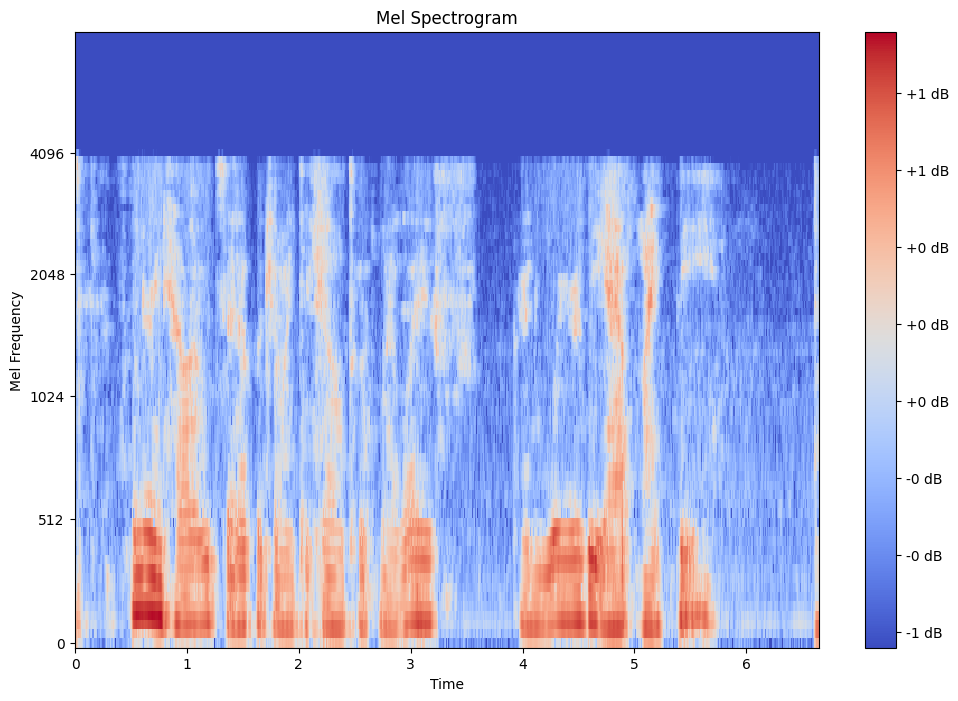

In [31]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

example = minds[0]
input_features = example["input_features"]

plt.figure(figsize=(12, 8))
librosa.display.specshow(
    np.asarray(input_features[0]),
    x_axis="time",
    y_axis="mel",
    sr=feature_extractor.sampling_rate,
    hop_length=feature_extractor.hop_length,
)

plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')  # Setting x-axis label
plt.ylabel('Mel Frequency')  # Setting y-axis label
plt.title('Mel Spectrogram')  # Optionally, add a title
plt.show()

In [32]:
example = minds[0]
for key, value in example.items():
    if key == 'input_features':  # Skip 'input_features'
        continue
    print(f"{key}: {value}")

path: /root/.cache/huggingface/datasets/downloads/extracted/28aa727f91fee90575c34956bab09d1716cfaf460c6afcba86a10f04a7d58b83/en-US~JOINT_ACCOUNT/602baf24bb1e6d0fbce922a7.wav
audio: {'path': None, 'array': array([-3.05175781e-05,  1.22070312e-04,  2.44140625e-04, ...,
        1.30310059e-02,  1.11389160e-02,  5.67626953e-03]), 'sampling_rate': 16000}
transcription: Henry County set up a joint account with my wife and where are they at
intent_class: 11


# Leveraging Whisper for Audio to Text Transcription

OpenAI's Whisper model represents a breakthrough in audio to text transcription technology, offering a powerful tool for converting spoken language into written text. This section guides you through the process of using the Whisper model to transcribe audio data. We'll explore two approaches: one using raw numpy arrays and another utilizing WAV files. By understanding these methods, you'll be equipped to transcribe audio data efficiently, a skill applicable in various domains, including voice recognition and natural language understanding.

To transcribe audio to text using OpenAI's Whisper model, you'll first need to ensure you have Whisper installed and then proceed with the Python code to load and transcribe the audio.

### Step 1: Install Whisper

First, ensure that you have OpenAI's Whisper installed:

In [33]:
%%capture
!pip install -q cohere openai tiktoken
!pip install -q git+https://github.com/openai/whisper.git


### Step 2: Load Your Audio Data

Let's use audio data from the `example` dataset, loaded into `wav_array` with a sampling rate defined as `sampling_rate`. This is great because Whisper needs the audio data in a format it can process.

In [34]:
from IPython.display import Audio

example = minds[200]
wav_array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

Audio(data=wav_array, rate=sampling_rate)


### Step 3a: Transcribe Audio to Text using numpy

In this example, audio data is converted to float32 before passing it to the model.transcribe() function. Here's how you can do it:

In [35]:
# NLTK helps to split the transcription sentence by sentence
# and shows it in a neat manner one below another. You will see it in the output below.

import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
import whisper
import numpy as np

# Assuming wav_array is your audio data and sampling_rate is defined

# Convert wav_array to float32
wav_array = wav_array.astype(np.float32)

# Initialize the Whisper model
model = whisper.load_model("small")  # Adjust model size as needed

# Transcribe the audio
result = model.transcribe(audio=wav_array)

# Display the transcription
print("Transcription:")
for sent in sent_tokenize(result['text']):
  print(sent)

Transcription:
 I am calling to find out what my upper limit for withdrawals is on my account.


### Step 3b: Transcribe Audio to Text using WAV file

In this example, we save the wav_array to a .wav file before transcribing. Here's how you can do it:

In [37]:
import soundfile as sf

# Save your wav_array to a file
sf.write('temp_audio.wav', wav_array, sampling_rate)

# Now transcribe the saved audio file
result = model.transcribe('temp_audio.wav')

# Print the transcription
print("Transcription:")
for sent in sent_tokenize(result['text']):
  print(sent)

Transcription:
 I am calling to find out what my upper limit for withdrawals is on my account.


# Gratitude

Many thanks to Naval Katoch for his valuable insights.